In [ ]:
import pandas as pd
import csv
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## EDA and Causal Diagram

In [ ]:
# Read the input file and select the columns
df = pd.read_csv("topic-semantic.csv",index_col=None)

In [ ]:
df = df[['LIKES','topic','emojis','num_mentions','num_hashtags','num_links','len','sentiment','JJ', 'NN', 'VBD', 'RB','IN', 'NNS', 'DT', 'VB', 'CC', 'VBG', 'PRP', 'VBP', 'VBZ', 'VBN']]

In [ ]:
# Install the causal learn library
!pip install causal-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 172 kB 5.3 MB/s 


In [ ]:
# Function to plot the causal graphs
from IPython.display import Image,display
def view_pydot(pdot):
  plt=Image(pdot.create_png())
  display(plt)

In [ ]:
from causallearn.search.ConstraintBased.FCI import fci
from causallearn.utils.GraphUtils import GraphUtils

In [ ]:
"""
Run the pc algorithm from causal learn package
It takes the numpy array of the data as an required arg
Plot the causal graph
"""
from causallearn.search.ConstraintBased.PC import pc
cg=pc(df.to_numpy(),verbose=True)
cg.draw_pydot_graph(labels=df.columns)

In [ ]:
# Install the dowhy and graph viz libraries
!pip install dowhy
!apt install libgraphviz-dev
!pip install pygraphviz

In [ ]:
from dowhy import CausalModel, plotter

In [ ]:
# Define the causal structure as a string

# causal_graph = """
# digraph{
#   emojis -> num_stop;
#   emojis -> len;
#   emojis -> sentiment;
#   emojis -> number_of_likes;
#   emojis -> num_links;
#   num_stop -> num_links;
#   num_stop -> number_of_likes;
#   num_stop -> sentiment;
#   num_stop -> num_hashtags;
#   num_mentions -> sentiment;
#   num_mentions -> number_of_likes;
#   num_mentions -> num_links;
#   len -> num_links;
#   len -> number_of_likes;
#   len -> sentiment;
#   len -> num_hashtags;
#   len -> num_stop;
#   num_hashtags -> sentiment;
#   num_hashtags -> num_links;
#   sentiment -> number_of_likes;
#   sentiment -> num_links;
#   number_of_likes -> num_links;
# }
# """

causal_graph = """
digraph{
  VBG -> VBZ;
  VBG -> len;
  VBG -> VBN;
  VBG -> NN;
  VBG -> JJ;
  num_mentions -> PRP;
  num_mentions -> num_links;
  num_mentions -> emojis;
  PRP -> num_hashtags;
  PRP -> NNS;
  PRP -> VBP;
  PRP -> num_links;
  PRP -> VB;  
RB -> num_hashtags;
RB -> num_links;
  RB -> JJ;
   RB -> DT;
  RB -> len;
  RB -> NNS;
  VBZ -> len;
  VBZ -> NNS;
  VBP -> len;
  VBP -> NNS;
  VB -> len;
  VB -> NN;
  VB -> CC;
  VB -> emojis;
  IN -> len;
  IN -> VB;
  IN -> CC;
  IN -> JJ;
  IN -> num_links;
  NNS -> len;
  VBD -> len;
  VBD -> JJ;
  VBD -> num_hashtags;
  VBD -> NN;
  VBD -> num_links;
  CC -> len;
  CC -> JJ;
  CC -> NN;
  len -> DT;
  DT -> VBN;
  DT -> JJ;
  DT -> NN;
  sentiment -> VBN;
  sentiment -> num_hashtags;
  sentiment -> emojis;
  VBN -> num_hashtags;
  VBN -> JJ;
  VBN -> NN;
  NN -> num_hashtags;
  NN -> emojis;
  NN -> num_links;
  num_links -> num_hashtags;
  num_links -> emojis;
  num_hashtags -> emojis;
  num_hashtags -> topic;
  topic -> RETWEET;
}
"""

# causal_graph = """
# digraph{
#   VBG -> VBZ;
#   VBG -> len;
#   VBG -> VBN;
#   VBG -> NN;
#   VBG -> JJ;
#   num_mentions -> PRP;
#   num_mentions -> num_links;
#   num_mentions -> emojis;
#   PRP -> num_hashtags;
#   PRP -> NNS;
#   PRP -> VBP;
#   PRP -> num_links;
#   PRP -> VB;  
# RB -> num_hashtags;
# RB -> num_links;
#   RB -> JJ;
#    RB -> DT;
#   RB -> len;
#   RB -> NNS;
#   VBZ -> len;
#   VBZ -> NNS;
#   VBP -> len;
#   VBP -> NNS;
#   VB -> len;
#   VB -> NN;
#   VB -> CC;
#   VB -> emojis;
#   IN -> len;
#   IN -> VB;
#   IN -> CC;
#   IN -> JJ;
#   IN -> num_links;
#   NNS -> len;
#   VBD -> len;
#   VBD -> JJ;
#   VBD -> num_hashtags;
#   VBD -> NN;
#   VBD -> num_links;
#   CC -> len;
#   CC -> JJ;
#   CC -> NN;
#   len -> DT;
#   DT -> VBN;
#   DT -> JJ;
#   DT -> NN;
#   sentiment -> VBN;
#   sentiment -> num_hashtags;
#   sentiment -> emojis;
#   VBN -> num_hashtags;
#   VBN -> JJ;
#   VBN -> NN;
#   NN -> num_hashtags;
#   NN -> emojis;
#   NN -> num_links;
#   num_links -> num_hashtags;
#   num_links -> emojis;
#   num_hashtags -> emojis;
#   num_hashtags -> topic;
#   topic -> LIKES;
#   VBN -> LIKES;
# }
# """

In [ ]:
def get_causal_estimate(input_df, causal_graph, treatment, outcome, control_value, treatment_value, plot=False):
  """
  Creates the model from the defined causal structure given the data, treatment &
  outcome variables
  Calculates the causal estimate (ATE) for the treatment variable given the 
  treatment and control value
  Returns the model, estimands and estimate
  Optionally plots the causal graph
  """
  model = CausalModel(
      data=input_df,
      treatment=[treatment],
        outcome = outcome,
        graph=causal_graph.replace("\n", " "),)
  
  estimands = model.identify_effect()
  print(estimands)

  estimate = model.estimate_effect(
      estimands,
      method_name = "backdoor.linear_regression",
      control_value = control_value,
      treatment_value = treatment_value
      )
  print(f"Causal estimate: {estimate.value}\n")

  if plot:
    plotter.plot_causal_effect(estimate, df[treatment], df[outcome])

  return model, estimands, estimate
      

In [ ]:
"""
Define the treatment vars and their control & treatment values
Create a df with the estimated values and write to output
"""
treatments = {
 "sentiment":{
     "control_value":0,
     "treatment_value":-1
 }, 
 "emojis":{
     "control_value":0,
     "treatment_value":5
 }, 
 "len":{
     "control_value":50,
     "treatment_value":200
 }, 
 "num_mentions":{
     "control_value":0,
     "treatment_value":5
 }
}



In [ ]:
"""
Alternatively, just define the treatment vars and pass default args to the 
treatment and control values
Create a df with the estimated values and write to output file
"""

treatments = ['topic','emojis','num_mentions','num_hashtags','num_links','len','sentiment','JJ', 'NN', 'VBD', 'RB','IN', 'NNS', 'DT', 'VB', 'CC', 'VBG', 'PRP', 'VBP', 'VBZ', 'VBN']

# df[['RETWEET','topic','emojis','num_mentions','num_hashtags','num_links','len','sentiment','JJ', 'NN', 'VBD', 'RB','IN', 'NNS', 'DT', 'VB', 'CC', 'VBG', 'PRP', 'VBP', 'VBZ', 'VBN']]
# for treatment, params in treatments.items():
estimates_likes = {}
for treatment in treatments:
  print(f"\n------------------{treatment}------------------\n")
  model, estimands, estimate = get_causal_estimate(df, causal_graph, treatment, "LIKES", 0, 1)#params["control_value"], params["treatment_value"])
  estimates_likes[treatment] = estimate.value

estmates_likes_df = pd.DataFrame(
    [(k,v) for (k,v) in estimates_likes.items()],
    columns=['Attribute','Causal Effect (ATE)']
    )

estmates_likes_df.to_csv('ate_likes.csv', index=0)


------------------topic------------------

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                     
────────(Expectation(LIKES|num_hashtags))
d[topic]                                 
Estimand assumption 1, Unconfoundedness: If U→{topic} and U→LIKES then P(LIKES|topic,num_hashtags,U) = P(LIKES|topic,num_hashtags)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
Causal estimate: 3.123225045422334


------------------emojis------------------

No directed path from ['emojis'] to ['LIKES'] in the causal graph.
Causal effect is zero.
linear_regression
Causal estimate: 0


------------------num_mentions------------------

Estimand

Causal estimate: 48.57579165504064


------------------JJ------------------

No directed path from ['JJ'] to ['LIKES'] in the causal graph.
Causal effect is zero.
linear_regression
Causal estimate: 0


------------------NN------------------

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                                  
─────(Expectation(LIKES|IN,sentiment,VBN,VBD,PRP,RB))
d[NN]                                                
Estimand assumption 1, Unconfoundedness: If U→{NN} and U→LIKES then P(LIKES|NN,IN,sentiment,VBN,VBD,PRP,RB,U) = P(LIKES|NN,IN,sentiment,VBN,VBD,PRP,RB)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
Causal estima

In [ ]:
# df[['RETWEET','topic','emojis','num_mentions','num_hashtags','num_links','len','sentiment','JJ', 'NN', 'VBD', 'RB','IN', 'NNS', 'DT', 'VB', 'CC', 'VBG', 'PRP', 'VBP', 'VBZ', 'VBN']]
# for treatment, params in treatments.items():
estimates = {}
for treatment in treatments:
  print(f"\n------------------{treatment}------------------\n")
  model, estimands, estimate = get_causal_estimate(df, causal_graph, treatment, "RETWEET", 0, 1)#params["control_value"], params["treatment_value"])
  estimates[treatment] = estimate.value

estmates_df = pd.DataFrame(
    [(k,v) for (k,v) in estimates.items()],
    columns=['Attribute','Causal Effect (ATE)']
    )

estmates_df.to_csv('ate_retweets.csv', index=0)


------------------topic------------------

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                          
────────(Expectation(RETWEET))
d[topic]                      
Estimand assumption 1, Unconfoundedness: If U→{topic} and U→RETWEET then P(RETWEET|topic,,U) = P(RETWEET|topic,)

### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(RETWEET, [num_hashtags])*Derivative([topic], [num_hasht
ags])**(-1))
Estimand assumption 1, As-if-random: If U→→RETWEET then ¬(U →→{num_hashtags})
Estimand assumption 2, Exclusion: If we remove {num_hashtags}→{topic}, then ¬({num_hashtags}→RETWEET)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
Causal estimate: 0.5350406487286574


---------------

Causal estimate: 2.7020646750130055


------------------JJ------------------

No directed path from ['JJ'] to ['RETWEET'] in the causal graph.
Causal effect is zero.
linear_regression
Causal estimate: 0


------------------NN------------------

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                                    
─────(Expectation(RETWEET|IN,sentiment,VBN,VBD,PRP,RB))
d[NN]                                                  
Estimand assumption 1, Unconfoundedness: If U→{NN} and U→RETWEET then P(RETWEET|NN,IN,sentiment,VBN,VBD,PRP,RB,U) = P(RETWEET|NN,IN,sentiment,VBN,VBD,PRP,RB)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
Expectation(Derivative(RETWEET, [topic])*Derivative([topic], [NN]))
Estimand assumption 1, Full-mediation: topic intercepts (blocks) all directed paths from NN to R,E,T,W,E,E,T.
Estimand assumption 2, First

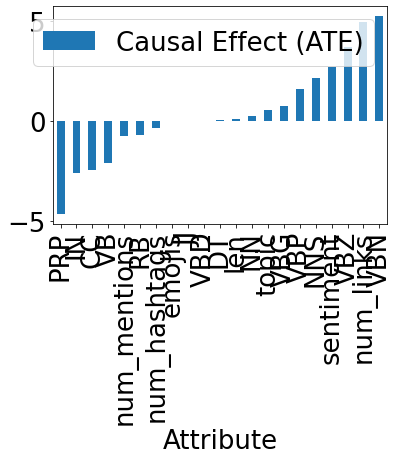

In [ ]:
estmates_df\
.set_index('Attribute')\
.sort_values(by='Causal Effect (ATE)')\
.plot(kind='bar')